# **Imporitng Necessary Libraries**

In [ ]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator
import random,os,glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# **Loading the Dataset**

In [ ]:
dir_path = '/content/drive/MyDrive/Garbage  Detection Dataset/Garbage-Classification/Garbage classification/Garbage classification'

In [ ]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [ ]:
len(img_list)

2527

In [ ]:
# accessing an image file from the dataset classes
image = cv2.imread('/content/drive/MyDrive/Garbage  Detection Dataset/Garbage-Classification/Garbage classification/Garbage classification/cardboard/cardboard291.jpg')

# **Data Pre-Processing**





In [ ]:
print(image.shape)

print(type(image))

print(image.dtype)

print(image)

(384, 512, 3)
<class 'numpy.ndarray'>
uint8
[[[144 171 198]
  [145 172 199]
  [146 173 200]
  ...
  [ 77  92 108]
  [ 76  91 107]
  [ 76  91 107]]

 [[144 171 198]
  [145 172 199]
  [146 173 200]
  ...
  [ 76  91 107]
  [ 76  91 107]
  [ 75  90 106]]

 [[144 171 198]
  [145 172 199]
  [146 173 200]
  ...
  [ 75  90 106]
  [ 75  90 106]
  [ 74  89 105]]

 ...

 [[ 93 123 152]
  [ 94 124 153]
  [ 94 124 153]
  ...
  [108 142 171]
  [108 142 171]
  [108 142 171]]

 [[ 93 123 150]
  [ 94 124 151]
  [ 96 126 153]
  ...
  [120 151 176]
  [120 151 176]
  [120 151 176]]

 [[ 94 124 151]
  [ 96 126 153]
  [ 98 128 155]
  ...
  [120 151 174]
  [120 151 174]
  [120 151 174]]]


### Edge Detection and Image Gradients

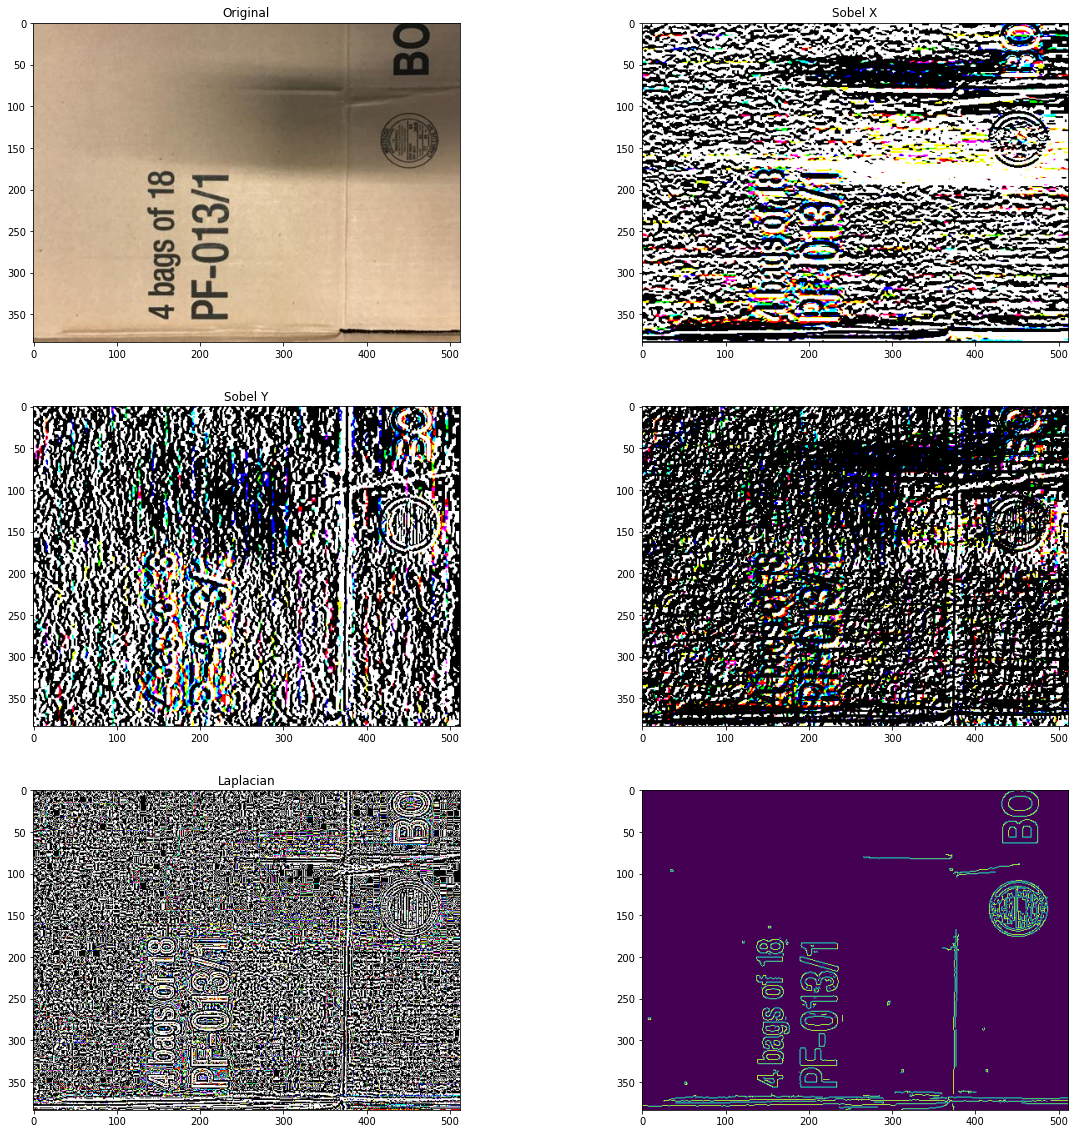

In [ ]:
# edge detection using the Sobel operator, which calculates the gradient of the image intensity in the x and y directions.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hgt, wdt,_ = image.shape

# Sobel Edges

x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)
sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.subplot(3, 2, 4)
plt.imshow(sobel_or)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.imshow(canny)

## Scaling, Interpolations, And Re-Sizing

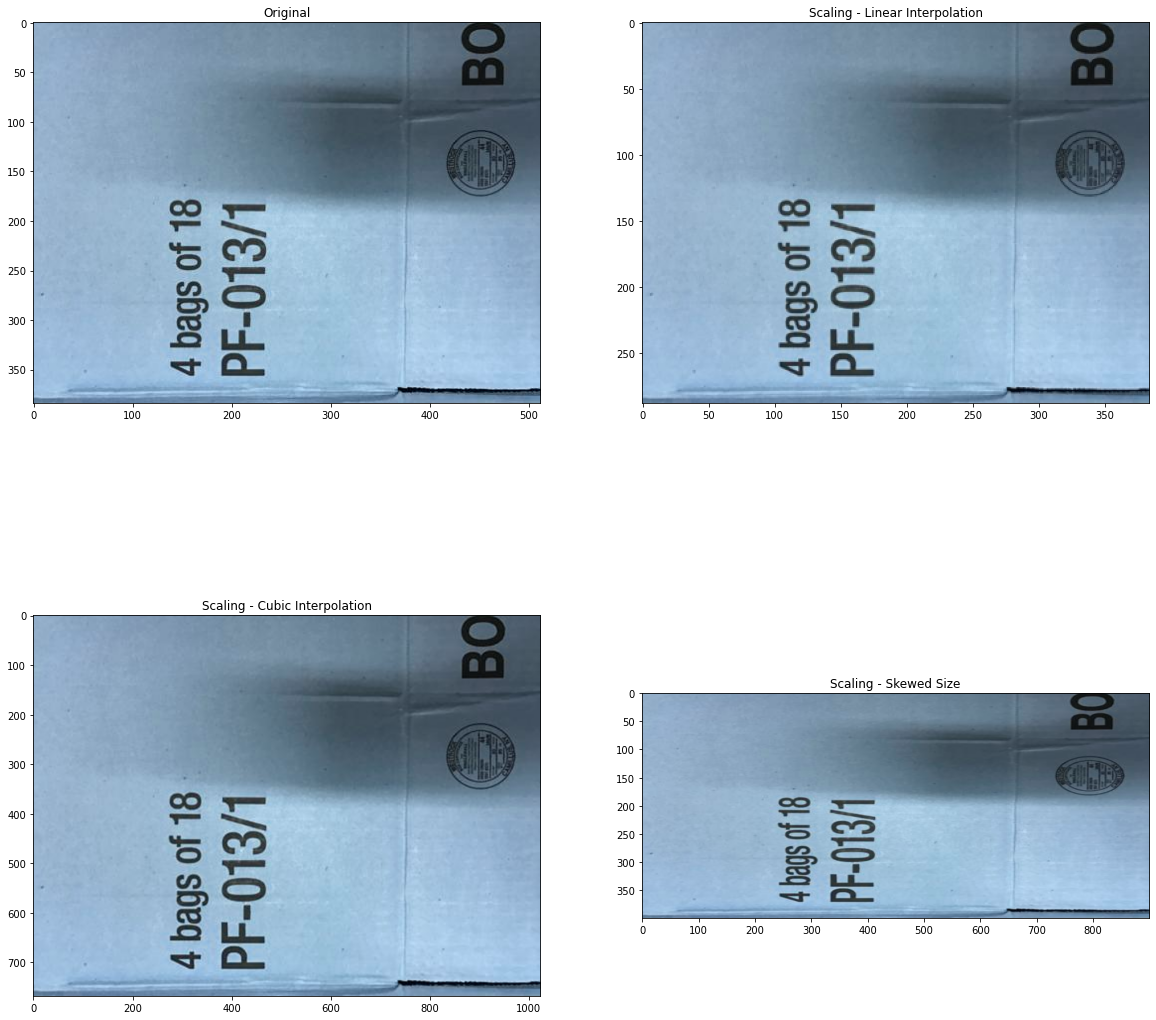

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)
img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

# Sharpening

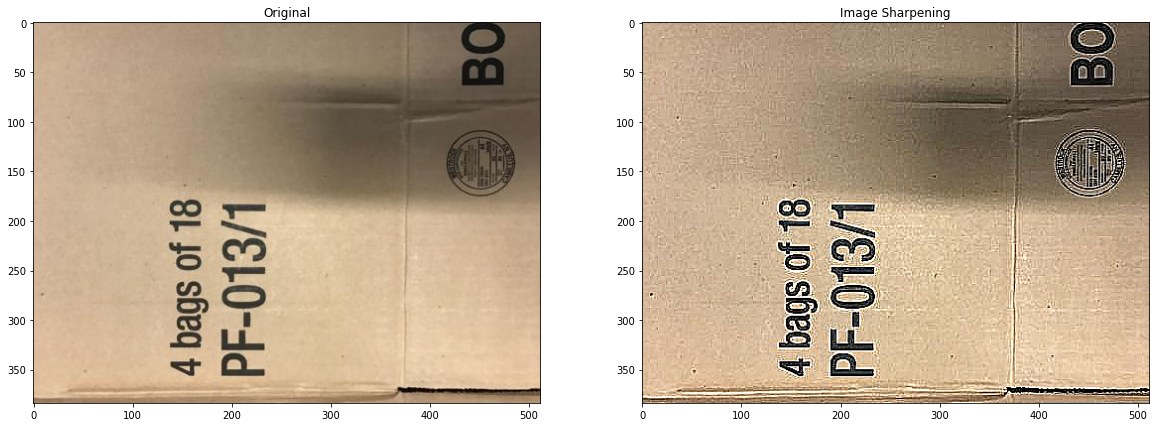

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

# **Flipping**

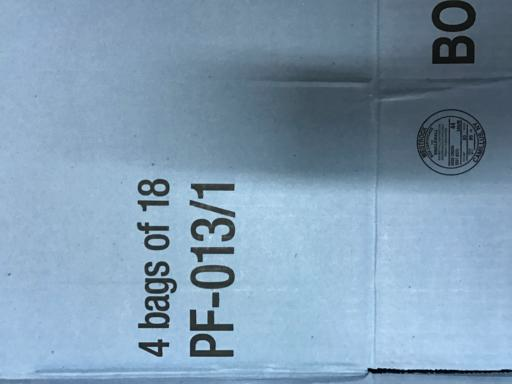

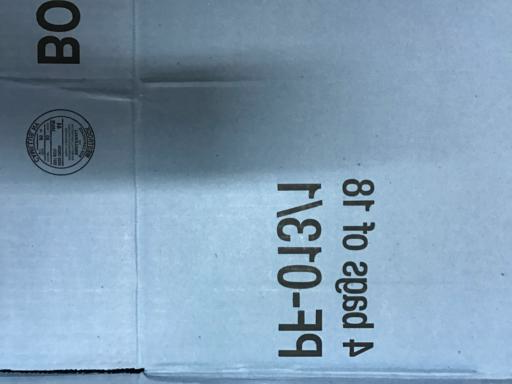

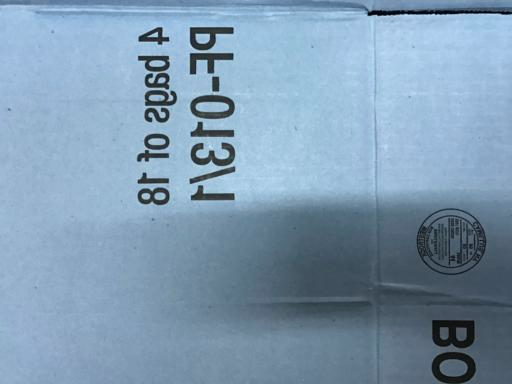

In [ ]:
from google.colab.patches import cv2_imshow
# flip vertically
flipped_vertically = cv2.flip(image, 0)

# flip horizontally
flipped_horizontally = cv2.flip(image, 1)

# display the original and flipped images
cv2_imshow(image)
cv2_imshow(flipped_horizontally)
cv2_imshow(flipped_vertically)


# Model **Building**

In [ ]:
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)
test=ImageDataGenerator(rescale=1/255,validation_split=0.1)
train_generator=train.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,
                                          class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,
                                        class_mode='categorical',subset='validation')
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
model=Sequential()
    
model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator, epochs=5, steps_per_epoch=2276//32,validation_data=test_generator,
                    validation_steps=251//32,callbacks=callbacks_list)

<ipython-input-14-714fa72c26c9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, steps_per_epoch=2276//32,validation_data=test_generator,


Epoch 1/5
71/71 [==============================] - ETA: 0s - loss: 1.5330 - acc: 0.3596
Epoch 1: val_acc improved from -inf to 0.40179, saving model to trained_model.h5
71/71 [==============================] - 68s 867ms/step - loss: 1.5330 - acc: 0.3596 - val_loss: 1.4818 - val_acc: 0.4018
Epoch 2/5
71/71 [==============================] - ETA: 0s - loss: 1.3521 - acc: 0.4483
Epoch 2: val_acc improved from 0.40179 to 0.44196, saving model to trained_model.h5
71/71 [==============================] - 64s 899ms/step - loss: 1.3521 - acc: 0.4483 - val_loss: 1.3365 - val_acc: 0.4420
Epoch 3/5
71/71 [==============================] - ETA: 0s - loss: 1.2630 - acc: 0.4964
Epoch 3: val_acc improved from 0.44196 to 0.53571, saving model to trained_model.h5
71/71 [==============================] - 61s 864ms/step - loss: 1.2630 - acc: 0.4964 - val_loss: 1.2560 - val_acc: 0.5357
Epoch 4/5
71/71 [==============================] - ETA: 0s - loss: 1.1708 - acc: 0.5441
Epoch 4: val_acc improved from 0.

In [ ]:
history

Text(0.5, 1.0, 'Training and Validation Accuracy')

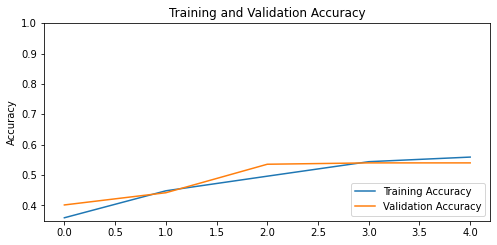

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

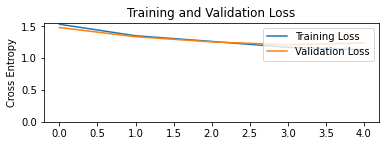

In [ ]:
# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# from keras.models import load_model
# import numpy as np
# from keras.preprocessing import image
# import tensorflow as tf
# from tensorflow.keras.utils import load_img,img_to_array
# import keras.utils as image


# # Load the trained model
# model = load_model('trained_model.h5')

# # Load the test image
# test_image = image.load_img('/content/drive/MyDrive/Garbage  Detection Dataset/Garbage-Classification/Garbage classification/Garbage classification/cardboard/cardboard101.jpg', target_size=(300, 300))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis=0)

# # Make a prediction on the test image
# result = model.predict(test_image)

# # Print the predicted class
# print(result)


1/1 [==============================] - 0s 129ms/step
[[1. 0. 0. 0. 0. 0.]]


1/1 [==============================] - 0s 127ms/step
[[0. 0. 0. 0. 1. 0.]]


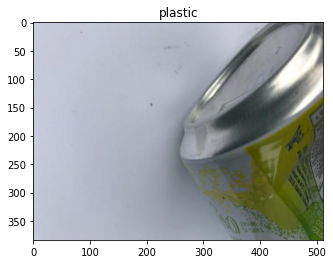

In [ ]:
from keras.models import load_model
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img,img_to_array
import keras.utils as image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('trained_model.h5')

# Load the test image
test_image = image.load_img('/content/drive/MyDrive/Garbage  Detection Dataset/Garbage-Classification/Garbage classification/Garbage classification/metal/metal10.jpg', target_size=(300, 300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make a prediction on the test image
result = model.predict(test_image)

# Print the predicted class
print(result)

# Convert the predicted result array to the class name
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
predicted_class = classes[np.argmax(result)]

# Load and display the original test image
img = load_img('/content/drive/MyDrive/Garbage  Detection Dataset/Garbage-Classification/Garbage classification/Garbage classification/metal/metal10.jpg')
plt.imshow(img)

# Add the predicted class as the title of the image
plt.title(predicted_class)

# Display the image
plt.show()


In [ ]:
#Evalution on testing data
print("Evaluate on test data")
results = model.evaluate(train, test, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data


NameError: ignored